**Problem Statement:** ABC Company provides instant credit loan to customers afetr analysing customer's application data. Company wants to automate this process. Task consists of two parts:
1. To classify if company should approve or reject customer's loan.
2. If loan get approved, then how much credit loan company can provide to customer so that risk of loss is minimum.

**Brief Idea of Solution:** 

Credit limit can be calculated on the basis of **credit score** which is a 3 digit number caluclated on the basis of many features. In current dataset **Portfolio_type** and **Asset Class cd** are two important features to generate credit score and so credit limit. Approval of credit loan is a **supervised binary classification**

**Asset_class_cd**
    how many days a payment on that account is late by that month. Anything but “000” or “STD” is considered negative by the lender
1. standard - payment made within 90 days
2. Sub-standard - payment made after 90 days
3. Doubtful - The account has remained Sub-Standard for 12 months
4. Loss (LSS): An account where loss has been identified and remains uncollectible
5. Default: No Days Late (**Assumption for the task**)
6. Special Mention Account: Account moving from standard to sub standard

**Portfolio_type:** 
1. Installment credit is considered less dangerous to your credit score than revolving credit.
2. Having a mortgage will also help your credit score because it increases the mix of credit you use. However, it's only 10 percent of your score and it typically won't have much of an impact unless you don't have much other credit history.**

**inquiry_purporse_code**
1. No of enquiries effect the credit score so need to check if inquiry_purporse_code will serve the purpose
Can be classified as secured and unsecured account type based on the type
1. Secured account type can have high credit score and therfore more credit limit
examples - secured credit such as home loans, car loans, secured credit cards, mortages, auto loans, car loan

2. Unsecured account type can have low credit score and therefore less credit limit

**Asset Code**
1. Joint can improve credit score over a period of time if joint holder having good credits score
2. authorized user can improve credit score
3. Guarantor can improve credit score
4. Deceased can decerease credit score

**Assumption about Target variable**
1.   Assumption: Approved 0 means Loan approved
2.   Approved 1 means loan rejected

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# load required libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings("ignore")
# plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams["xtick.labelsize"] = 10

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# read data 
def read_data(path):
  data = pd.read_csv(path, index_col=0)
  return data

complete_data = read_data(r"/content/drive/My Drive/Simpl/simpl_payments_bank_digicard_v1.0.csv")
# Keep a copy of original data
original = complete_data

complete_data.head(3)

,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
user_id,,,,,,,,,,,,,,,,,,,,
307c73a3-0c67-43b5-b0d1-62ad5f00b52a,Female,1987-01-03,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,0,"45424 Norris Common Apt. 390\nNorth Mike, AR 8...",vasquezleah@yahoo.com,7.0,PVT,5,NaN,1.0,R
519481f1-604d-48b6-aa47-4123a982431a,Male,1970-01-07,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,0,"5022 Rebecca Haven Apt. 258\nThompsonfurt, CT ...",johnsontrevor@hotmail.com,13.0,NBF,5,NaN,1.0,R
f66fe2c6-53e3-46ce-8321-e530b4af1ace,Male,1973-01-06,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,0,"8780 Brown Loaf Apt. 099\nNorth David, NJ 56510",morganemily@gmail.com,13.0,NBF,5,NaN,1.0,R


In [4]:
# check for duplicate data points 

print(complete_data.shape)

# Dropping the duplicate Rows
complete_data = complete_data.drop_duplicates(keep = 'first')
complete_data.shape


(45222, 20)


(45222, 20)

In [5]:
# Basic Summary of dataset
def summary_dataset(df):
    summary = df.describe()
    print('='*80)
    data_info = df.info()
    return (summary,data_info)

summary,data_info = summary_dataset(complete_data)
print("\nsummary of dataset: ", summary)

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 307c73a3-0c67-43b5-b0d1-62ad5f00b52a to 82eab6e5-57ab-4fd7-8923-e7790390c473
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                45222 non-null  object 
 1   date_of_birth         45222 non-null  object 
 2   workclass             45222 non-null  object 
 3   education_level       45222 non-null  object 
 4   education_num         45222 non-null  float64
 5   marital_status        45222 non-null  object 
 6   occupation            45222 non-null  object 
 7   relationship          45222 non-null  object 
 8   capital_gain          45222 non-null  float64
 9   capital_loss          45222 non-null  float64
 10  hours_per_week        45222 non-null  float64
 11  approved              45222 non-null  int64  
 12  address               45222 non-null  object 
 13  email                 45222 non-null  object 
 14  inquiry_p

**There are total 45222 data points and 20 columns. The taregt variable approved defines if customer was approved for credit loan or not based on features privided. Missing values can be present in inquiry_purpose_code, asset_class_cd, asset_code, portfolio_type. Need to check**

In [0]:
# Stratified Sampling using Scikit-learn's StratifiedShuffleSplit Class

# Split in starting

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(complete_data, complete_data["approved"]):
    strat_train_set = complete_data.iloc[train_index]
    strat_test_set = complete_data.iloc[test_index]

**check If training and testing data have equal proportion of target class to avoid model being biased towards one class**

In [7]:
# approved category proportion in test set generated with stratified sampling
strat_test_set["approved"].value_counts() / len(strat_test_set)

0    0.752128
1    0.247872
Name: approved, dtype: float64

In [8]:
# approved category proportion in full dataset

complete_data["approved"].value_counts() / len(complete_data)

0    0.752156
1    0.247844
Name: approved, dtype: float64

**Exploratory data Analysis**

**Custom function for Categorical Variable Analysis**

In [0]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data

    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot

    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('='*80)
    print("Unique Values including NaN:",series.nunique())
    print('='*80)
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())
    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count     45222
unique        2
top        Male
freq      30527
Name: gender, dtype: object
Unique Values including NaN: 2
mode:  0     Male
dtype: object
 Male      30527
 Female    14695
Name: gender, dtype: int64


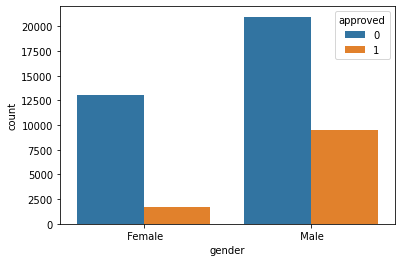

In [10]:
c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(complete_data, x='gender', hue='approved', palette=c_palette)

Out of total customers, **Male have applied for larger majority of loans**(30,527) and women have applied for less number of loans(14,695). **Male applicants are more than double.** Also a larger **percentage of female got loan approval(86%) than Male (68%).**

In [0]:
# Convert Date column to Age as Age would be a better variable 

complete_data['date_of_birth']=pd.to_datetime(complete_data['date_of_birth'], yearfirst=True)

complete_data["age"] = (pd.to_datetime('now') - complete_data["date_of_birth"]).astype('<m8[Y]')

complete_data.drop('date_of_birth', axis=1, inplace=True)

**Categorical Variable Analysis with Target**


Column:	 education_level
count        45222
unique          16
top        HS-grad
freq         14783
Name: education_level, dtype: object
Unique Values including NaN: 16
mode:  0     HS-grad
dtype: object
 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education_level, dtype: int64


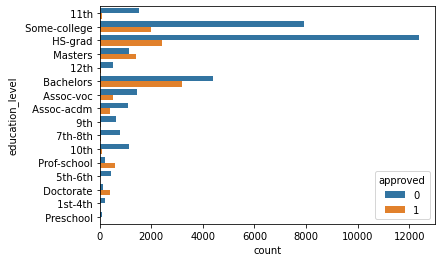

Column:	 marital_status
count                   45222
unique                      7
top        Married-civ-spouse
freq                    21055
Name: marital_status, dtype: object
Unique Values including NaN: 7
mode:  0     Married-civ-spouse
dtype: object
 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital_status, dtype: int64


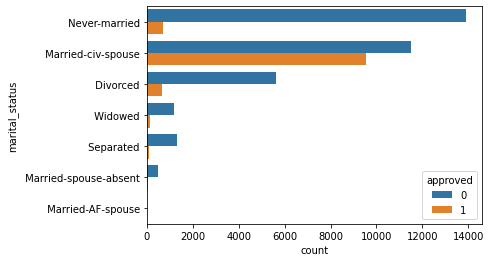

Column:	 occupation
count             45222
unique               14
top        Craft-repair
freq               6020
Name: occupation, dtype: object
Unique Values including NaN: 14
mode:  0     Craft-repair
dtype: object
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64


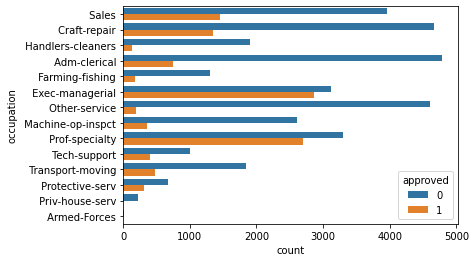

Column:	 relationship
count        45222
unique           6
top        Husband
freq         18666
Name: relationship, dtype: object
Unique Values including NaN: 6
mode:  0     Husband
dtype: object
 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1349
Name: relationship, dtype: int64


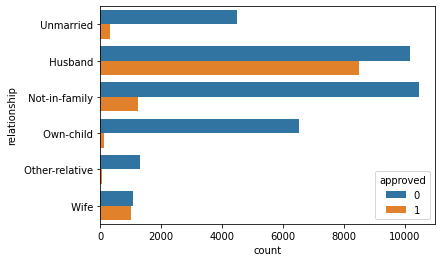

Column:	 workclass
count        45222
unique           7
top        Private
freq         33307
Name: workclass, dtype: object
Unique Values including NaN: 7
mode:  0     Private
dtype: object
 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64


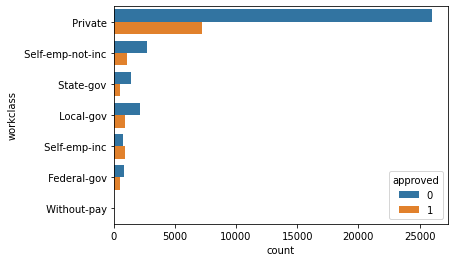

In [12]:
columns = ['education_level','marital_status','occupation','relationship','workclass']
for col in columns:
  print("Column:\t", col)
  categorical_summarized(complete_data, y=col, hue='approved', palette=c_palette)

Column:	 institute_type
count     45222
unique       10
top         PVT
freq      26669
Name: institute_type, dtype: object
Unique Values including NaN: 10
mode:  0    PVT
dtype: object
PVT    26669
NBF    15927
PUB     1226
HFC      906
BRO      303
FOR      107
INS       41
COB       35
TEL        4
SRC        4
Name: institute_type, dtype: int64


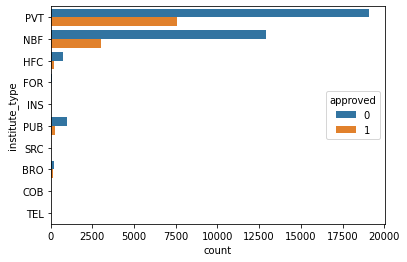

Column:	 asset_class_cd
count     9492
unique       8
top          S
freq      8609
Name: asset_class_cd, dtype: object
Unique Values including NaN: 8
mode:  0    S
dtype: object
S     8609
?      319
B      230
L      144
D      110
M       78
-1       1
01       1
Name: asset_class_cd, dtype: int64


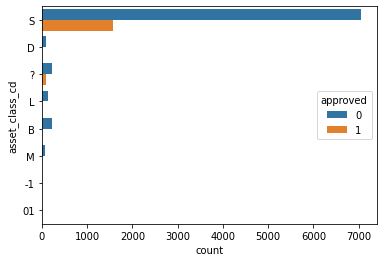

Column:	 portfolio_type
count     45216
unique        4
top           R
freq      26967
Name: portfolio_type, dtype: object
Unique Values including NaN: 4
mode:  0    R
dtype: object
R    26967
I    17088
M     1146
F       15
Name: portfolio_type, dtype: int64


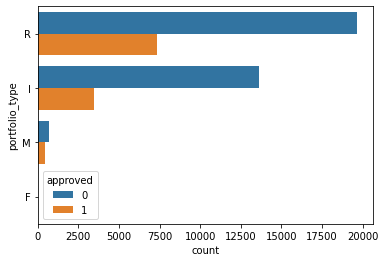

In [13]:
columns = ['institute_type', 'asset_class_cd', 'portfolio_type']
for col in columns:
  print("Column:\t", col)
  categorical_summarized(complete_data, y=col, hue='approved', palette=c_palette)

**1.customers having education level college, graduation, Masters, Bachelors, Hs-Grad have maximum proprotion of loan applied and approveed. Customers having education level of school have less chance of loan approval.**

**2. Highest percentage of people who are single and who are having civil spouse.**

**3. Private Working people have highest applications and maximum approval rate.**


**Numerical Variable Analysis**

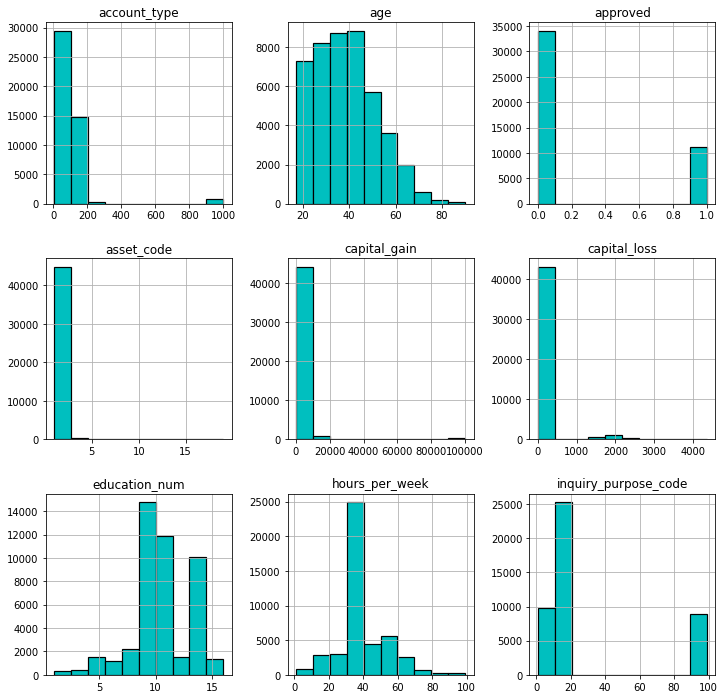

In [14]:
# Distribution of Different Features of the Dataset
distribution = complete_data.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

**Target Variable is Imbalanced**

**Most of customers are between 20 to 60 which seems reasonable**

**Maximum percentage of distribution is having 40 hours per week. It seems reasonable**

**Most People have capital gain and capital loss as 0 so most people neither have extra loss or extar gain through investments**

In [15]:
capital_gain_outlier = complete_data[['approved','capital_gain']][(complete_data['capital_gain']!=0)]
capital_gain_outlier.head()

,approved,capital_gain
user_id,,
9c50eb6e-aa75-4194-a274-118b4070f5c4,0,114.0
95861b76-d1e7-41c8-9f58-50be4f205f9d,0,114.0
4bce7040-2503-4b5b-b54a-ff29db6c80f1,0,114.0
487dc5a4-b961-434f-9a8d-3a8b8b37326a,0,114.0
dde193ed-7a0a-4d6a-bd13-740b7354b75e,0,114.0


**Wherever capital gain is not zero, capital gain has constant value**

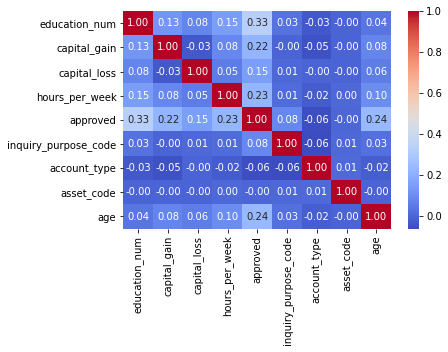

In [16]:
# Correlation matrix between numerical values
g = sns.heatmap(complete_data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

**By Looking at map we can say target is not dependent on inquiry_purpose_code,account_type,asset_code**

**Feature Engineering**

1. change marital status to married and single
3. drop education, relationship and occupation
4. drop inquiry_purpose_code,account_type,asset_code
5. check for missing values
6. perform one hot encoding
7. feature scaling if required
8. divide into train and test
9. build model
10. choose confusion metrix and roc_auc curve

In [0]:
complete_data['marital_status']=complete_data['marital_status'].map({' Married-civ-spouse':'Married', ' Divorced':'Single', ' Never-married':'Single', ' Separated':'Single', 
' Widowed':'Single', ' Married-spouse-absent':'Married', ' Married-AF-spouse':'Married'})

In [0]:
#complete_data=complete_data.drop(['occupation','education_level','relationship','inquiry_purpose_code','account_type','asset_code','address','email','asset_class_cd'],axis=1)

**Prepare the data for Machine Learning algorithms**

1. Code to drop label from training data
2. Separate numerical and categorical features to process them separately
3. fill missing values in numerical features and scale features. Save median value so that can be used when system goes live
2. Code to convert marital_status in tocateories
3. Code to remove features
4. Code to convert date of birth into age
5. Code to select dataframe subset from a dataframe as scikit learn doesn't wortk with dataframes
6. Code to fill missing values in categorical features
6. Code to convert categorical features to one hot encoding
7. Code to fill missing values in numerical 
7. Code to scale numerical features


**Check For Missing Values percentage in columns**

In [19]:
percent_missing = strat_train_set.isnull().sum() * 100 / len(strat_train_set)
missing_value_df = pd.DataFrame({'column_name': strat_train_set.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
asset_class_cd,asset_class_cd,78.972828
inquiry_purpose_code,inquiry_purpose_code,2.866462
asset_code,asset_code,0.176908
portfolio_type,portfolio_type,0.008293
date_of_birth,date_of_birth,0.000000
account_type,account_type,0.000000
institute_type,institute_type,0.000000
email,email,0.000000
address,address,0.000000
approved,approved,0.000000


**Portfolio type has small percentage of missing values**

Let's revert to a clean training and testing dataset

**Remove label from training and testing dataset**

In [0]:
train_features = strat_train_set.drop("approved", axis=1) # drop labels for training set
train_labels = strat_train_set["approved"].copy()

test_features = strat_test_set.drop("approved", axis=1) # drop labels for training set
test_labels = strat_test_set["approved"].copy()


**All Feature Engineering steps on clean training and testing data**

In [0]:
train_features['marital_status']=train_features['marital_status'].map({' Married-civ-spouse':'Married', ' Divorced':'Single', ' Never-married':'Single', ' Separated':'Single', 
' Widowed':'Single', ' Married-spouse-absent':'Married', ' Married-AF-spouse':'Married'})

train_features=train_features.drop(['occupation','education_level','relationship','inquiry_purpose_code','account_type','asset_code','address','asset_class_cd','email'],axis=1)

# Convert Date column to Age as Age would be a better variable 

train_features['date_of_birth']=pd.to_datetime(train_features['date_of_birth'], yearfirst=True)

train_features["age"] = (pd.to_datetime('now') - train_features["date_of_birth"]).astype('<m8[Y]')

train_features.drop('date_of_birth', axis=1, inplace=True)

In [0]:
test_features['marital_status']=test_features['marital_status'].map({' Married-civ-spouse':'Married', ' Divorced':'Single', ' Never-married':'Single', ' Separated':'Single', 
' Widowed':'Single', ' Married-spouse-absent':'Married', ' Married-AF-spouse':'Married'})

test_features=test_features.drop(['occupation','education_level','relationship','inquiry_purpose_code','account_type','asset_code','address','asset_class_cd','email'],axis=1)

# Convert Date column to Age as Age would be a better variable 

test_features['date_of_birth']=pd.to_datetime(test_features['date_of_birth'], yearfirst=True)

test_features["age"] = (pd.to_datetime('now') - test_features["date_of_birth"]).astype('<m8[Y]')

test_features.drop('date_of_birth', axis=1, inplace=True)

In [0]:
# Separate categorical and Numerical columns based on data types
column_names = train_features.columns.values
num_cols = list(train_features._get_numeric_data().columns)
cat_cols = list(set(column_names) - set(num_cols))

train_features_num = train_features[num_cols]

train_features_cat = train_features[cat_cols]

# print("Numerical Columns are: ",num_cols)
# print("\ncategorical Columns are: ",cat_cols)

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
# Now let's build a pipeline for preprocessing the numerical attributes:

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_cols)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_features_num_tr = num_pipeline.fit_transform(train_features_num)

# output of numerical pipeline is array
# convert array to pandas dataframe again

train_features_num_tr =  pd.DataFrame( train_features_num_tr, columns=train_features_num.columns)


**Handling Categorical Attributes**

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [0]:
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_cols)),
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [0]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [29]:
train_features.columns

Index(['gender', 'workclass', 'education_num', 'marital_status',
       'capital_gain', 'capital_loss', 'hours_per_week', 'institute_type',
       'portfolio_type', 'age'],
      dtype='object')

In [0]:
# apply the full pipeline on training data
train_data_prep = full_pipeline.fit_transform(train_features)

test_data_prep  = full_pipeline.transform(test_features)

**Select and Train a Model**

In [0]:
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,auc,confusion_matrix

In [0]:
final_table = PrettyTable()
final_table.field_names=['Algorithm','Train accuracy','Test accuracy']


class ApplyModel:
    
    def __init__(self,train=0,test=0,ytrain=0,ytest=0,algorithm='logistic',basedir="data/"):
        '''
            Given train,test data along with target labels, we can apply machine learning algorithms like
            logistic regression, naive bayes, sklearn sgd.
            
            train   : train data
            test    : test  data
            ytrain  : target labels of train data
            ytest   : target labels of test  data
            algorithm: which algorithm to use 
                        (logistic : to use logistic regression
                         naive    : to use naive bayes 
                         sgd      : to use sklearns sgd)
                         
        '''
        self.model = 0
        self.algorithm = algorithm
        self.hyperparameter = 0

        self.train = train
        self.test  = test

        self.ytrain= ytrain
        self.ytest = ytest

        self.train_score = 0
        self.test_score = 0
        self.basedir    = basedir
        
        
        
    def assign(self):
        if self.algorithm == 'logistic':
            self.model = LogisticRegression(class_weight='balanced',random_state=45)
            
            self.hyperparameter = {'C':[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
            
#         elif self.algorithm == 'naive':
#             self.model = MultinomialNB()
#             self.hyperparameter = {'alpha':[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

        elif self.algorithm == 'random_forest':
            self.model = RandomForestClassifier()
            self.hyperparameter = {'n_estimators':[1, 10, 50, 80, 100,200,400,500],
                                   'max_depth':[2,3,5,7,9,11],
                                   'min_samples_split':[2,3,5,7,9,11]}
        elif self.algorithm == 'decision_tree':
            self.model = RandomForestClassifier()
            self.hyperparameter = {'max_depth':[2,3,5,7,9,11],
                                   'min_samples_split':[2,3,5,7,9,11]}
        elif self.algorithm == 'xgb':
            self.model = XGBClassifier()
            self.hyperparameter = { 'eta':[1e-05, 0.0001, 0.001, 0.01, 0.1],
                                    'gamma':[1, 10, 30, 50, 80, 90, 100],
                                    'max_depth':[2,3,5,7,9,11]
                                   }

        elif self.algorithm == 'sgd':
            self.model = SGDClassifier(class_weight='balanced',random_state=45)
            self.hyperparameter = {'alpha':[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                                   'loss':['hinge', 'log', 'modified_huber']}
      
        else:
            return 'InValiedModel'

  
    def gridsearch(self,verbose=1):
        '''
            Applies gridsearch operation for hyperparameter tuning and stores best mode into self.model
        '''

        gridsearch = GridSearchCV(self.model,self.hyperparameter,scoring='accuracy',n_jobs=-1,verbose=verbose)
        gridsearch.fit(self.train,self.ytrain)
        self.model = gridsearch.best_estimator_

    def test_data(self):
            '''
                Prints accuracy for train and test for  with best model
            '''
            self.model.fit(self.train,self.ytrain)

            train_pred = self.model.predict(self.train)
            test_pred   = self.model.predict(self.test)

            #self.train_accuracy = accuracy_score(train_pred,self.ytrain)
            #self.test_accuracy   = accuracy_score(test_pred,self.ytest)


            #print('Train accuracy {} Test accuracy {}'.format(self.train_accuracy,self.test_accuracy))


            
    def plot(self,type_='cmat',save=True):
            '''
                Plots confusion matrix for train and test data
            '''
            if type_ == 'cmat':

                cm_train=pd.DataFrame(confusion_matrix( self.ytrain, self.model.predict(self.train)),index=['No','Yes'],columns=['No','Yes'])
                cm_test =pd.DataFrame(confusion_matrix( self.ytest, self.model.predict(self.test)),index=['No','Yes'],columns=['No','Yes'])

                cm_train.index.name='Actual'
                cm_train.columns.name ='Predicted'

                cm_test.index.name='Actual'
                cm_test.columns.name ='Predicted'

                fig,ax = plt.subplots(ncols=2,figsize=(15,5))
                ax[0]  = plt.subplot(1,2,1,xlabel='Predicted',ylabel='Actual')
               
                ax[1]  = plt.subplot(1,2,2,xlabel='Predicted',ylabel='Actual')
                
                ax[0].set_title('Train Data')
               
                ax[1].set_title('Test Data')


                train_heatmap = sns.heatmap(cm_train,annot=True,fmt='d',ax=ax[0],cmap='GnBu')
                test_heatmap = sns.heatmap(cm_test ,annot=True,fmt='d',ax=ax[1],cmap='GnBu')
                
                #plt.savefig(self.basedir+'images/plots/'+self.algorithm+'_c_mat.jpg')
                plt.show()

    def auc(self):
        '''This function plots AUC plot by calculating TPR and FPR values and returns the log plrobabilities'''
       
        
        model=self.model
                
        ytrain_pred=model.predict_proba(self.train)[:,1]
        ytest_pred=model.predict_proba(self.test)[:,1]
        
        train_fpr,train_tpr,train_threshold=roc_curve(self.ytrain,ytrain_pred)
        test_fpr,test_tpr,test_threshold=roc_curve(self.ytest,ytest_pred)
        plt.figure(figsize=(15,7))
        plt.plot(train_fpr,train_tpr,label='Train AUC :'+ (str(auc(train_fpr , train_tpr))))
        plt.plot(test_fpr,test_tpr,label='Test AUC:'+str(auc(test_fpr, test_tpr)))
        plt.xlabel('Hyperparameters',size=10)
        plt.ylabel('AUC',size=10)
        plt.title('Reciever Operating Characterstic Curve')
        plt.legend(prop={'size':20})
        plt.grid()
        plt.show()
      
        self.plot()
           
    def tableit(self,vector,table=final_table):
            
            '''
                Used to tabulize the train,test accuracy along with the model and vector(count,tfidf,both)
                
                vector : vector used in model(countvector/tfidfvector/both)
            '''

            table.add_row([self.algorithm,self.train_accuracy,self.test_accuracy])



**Logistic Regression**

In [33]:
algo = 'logistic'
logistic_model = ApplyModel(train = train_data_prep,test = test_data_prep,ytrain=train_labels,ytest=test_labels,algorithm=algo)
logistic_model.assign()

logistic_model.gridsearch(10)
# time.sleep(0.2)
print('----'*5)
print('Testing  Data...')
logistic_model.test_data()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1942s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  87 out of  90 | elapsed:   12.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   12.5s finished


--------------------
Testing  Data...


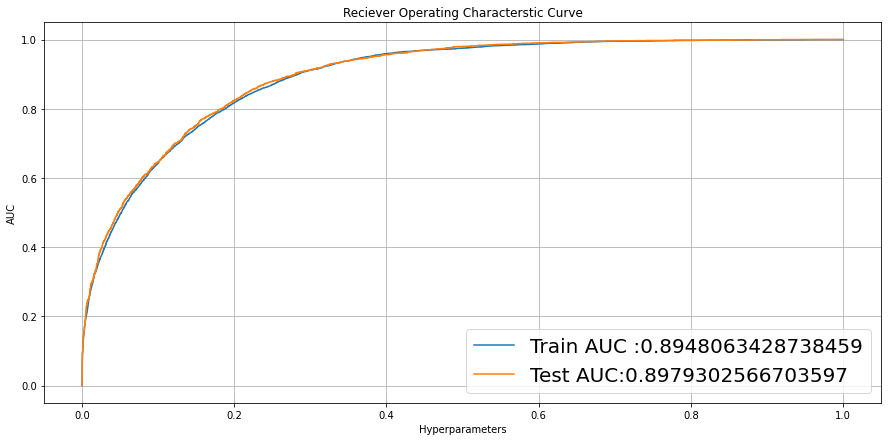

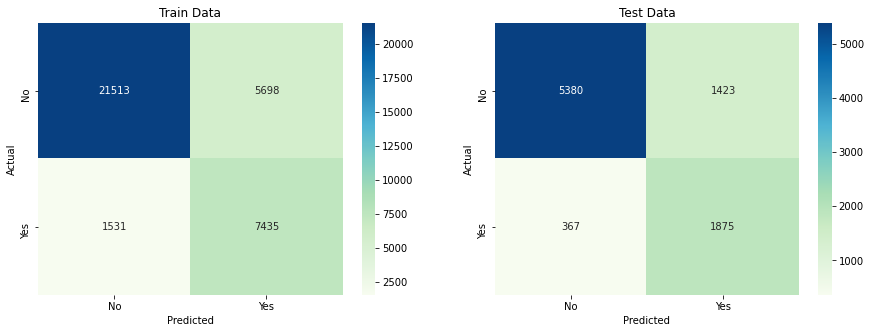

In [34]:
logistic_model.auc()

In [35]:
algo = 'random_forest'
rf_model = ApplyModel(train = train_data_prep,test = test_data_prep,ytrain=train_labels,ytest=test_labels,algorithm=algo)
rf_model.assign()
rf_model.gridsearch(10)
# time.sleep(0.2)
print('----'*5)
print('Testing  Data...')
rf_model.test_data()

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1361s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3103s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:  1.4min
[Parallel(n_jo

--------------------
Testing  Data...


**Feature Importance using Random Forest**

In [36]:
importances = rf_model.model.feature_importances_
#plt.bar([x for x in range(len(importances))], importances)
importances

array([1.75188742e-01, 1.97649713e-01, 6.05113119e-02, 5.82561453e-02,
       8.25419126e-02, 1.14467742e-03, 2.60449255e-04, 3.75085617e-04,
       1.50985639e-03, 1.47508970e-04, 7.36604716e-03, 1.00572217e-03,
       6.41244311e-03, 5.81362903e-07, 3.69408821e-05, 1.66087131e-01,
       1.78134326e-01, 4.26040009e-03, 1.86433832e-03, 4.66349484e-03,
       8.60435046e-03, 6.40788642e-03, 1.32716305e-03, 6.37998722e-05,
       1.03033278e-02, 1.35840475e-02, 2.45785755e-04, 5.53977752e-03,
       3.32218707e-03, 3.18484674e-03])

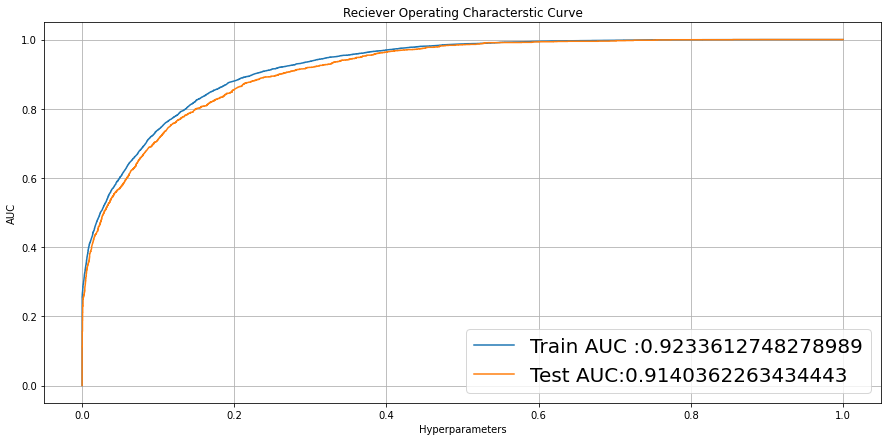

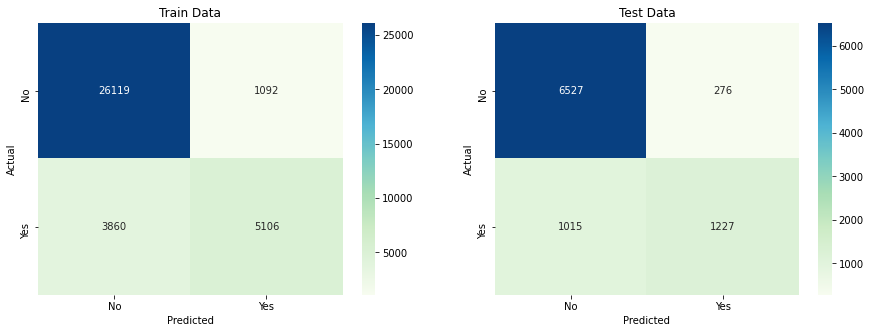

In [37]:
rf_model.auc()

In [38]:
algo = 'xgb'
xgb_model = ApplyModel(train = train_data_prep,test = test_data_prep,ytrain=train_labels,ytest=test_labels,algorithm=algo)
xgb_model.assign()
xgb_model.gridsearch(10)
# time.sleep(0.2)
print('----'*5)
print('Testing  Data...')
xgb_model.test_data()

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  9

--------------------
Testing  Data...


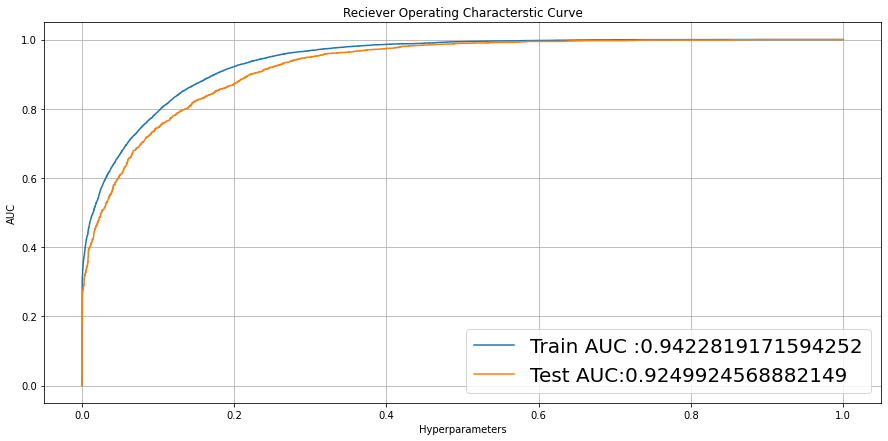

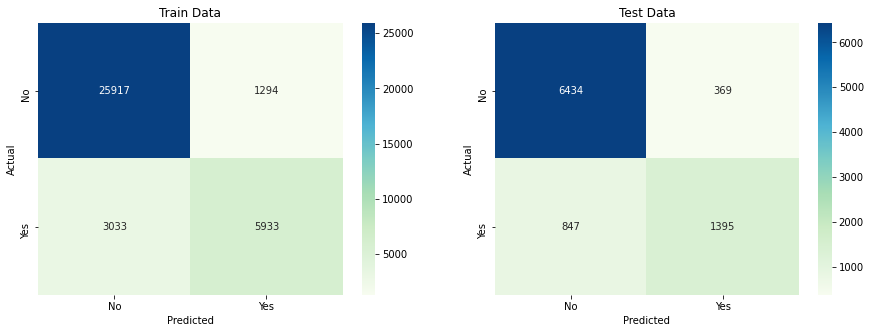

In [39]:
xgb_model.auc()

**Out of approved loans, Credit limit can be decided on basis of inquiry_purpose_code, asset_class_cd, portfolio_type**

In [0]:
# Merge NaN, -1, 01 with N for default account

complete_data['asset_class_cd']=complete_data['asset_class_cd'].fillna('N')
complete_data['asset_class_cd']=complete_data['asset_class_cd'].replace(to_replace=['-1','01','?'],value='N')

complete_data['inquiry_purpose_code']=complete_data['inquiry_purpose_code'].map({7:'unsecured', 1:'secured',2:'secured', 4:'secured',
    5:'secured', 3:'unsecured',  6:'secured', 8:'unsecured', 9:'unsecured',10:'secured',11:'unsecured',
    12:'unsecured', 13:'unsecured', 14:'secured',15:'secured',16:'secured', 17:'unsecured', 18:'secured', 19:'unsecured', 99:'unsecured'})



In [0]:
def credit_limit(df):
    if df.loc[(df['inquiry_purpose_code']=='secured') & (df['asset_class_cd'].isin(['N', 'S'])) & 
              (df['portfolio_type'].isin(['I','R']))]:
        cred_limit = '8000$'
        
    elif df.loc[(df['inquiry_purpose_code']=='secured') & (df['asset_class_cd'].isin(['N', 'S']))]:
        cred_limit = '7000$'
        
    elif df.loc[df['asset_code'].isin([2, 9, 4])]:
        cred_limit = '3000$'
  
    elif df.loc[df['asset_class_cd'].isin(['B', 'M'])]:
        cred_limit = '2000$'
       
    else:
        cred_limit = '1000$'
    return cred_limit

In [0]:
complete_data['credit_score'] = complete_data.apply(credit_limit, axis=1)

**Instead of directly taking credit limit, can generate credit score and use credit score as a feature for approval or rejection of loans.**
